# Welcome to the Perceptron demo page
# Most of the inspiration comes from the book Grokking Machine Learning from Manning. A really good book to get into Machine Learning

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random

In [29]:
data = pd.DataFrame({
    "sentence": ["tjilp tjilp tjilp","mwah mwah", "tjilp mwah tjilp", "tjilp mwah mwah", "mwah mwah mwah tjilp", "tjilp mwah tjilp mwah tjilp"],
    "tjilp":[3,0,2,1,1,3],
    "mwah": [0,2,1,2,3,2],
    "mood": ["Happy", "Sad", "Happy", "Sad", "Sad", "Happy"]
    })

In [30]:
data

,sentence,tjilp,mwah,mood
0,tjilp tjilp tjilp,3,0,Happy
1,mwah mwah,0,2,Sad
2,tjilp mwah tjilp,2,1,Happy
3,tjilp mwah mwah,1,2,Sad
4,mwah mwah mwah tjilp,1,3,Sad
5,tjilp mwah tjilp mwah tjilp,3,2,Happy


In [31]:
def plot_sentiment(happy_data, sad_data):
    tick_spacing = 1
    fig, ax = plt.subplots(1,1)

    ax.scatter(happy_data["tjilp"], happy_data["mwah"], c='g',marker='o', label='Happy')
    ax.scatter(sad_data["tjilp"], sad_data["mwah"], c='r',marker='x', label='Sad')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    plt.title('Happy or Sad sentence')
    plt.ylabel('Mwah')
    plt.xlabel('Tjilp')
    plt.rcParams["figure.figsize"] = (8,6)
    plt.legend()
    plt.grid()
    plt.show()

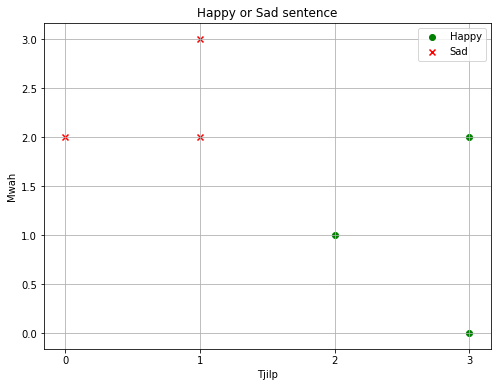

In [32]:
happy_sentence = data[data["mood"] == "Happy"]
sad_sentence = data[data["mood"] == "Sad"]
plot_sentiment(happy_sentence, sad_sentence)

In [33]:
data = pd.DataFrame({
    "sentence": ["tjilp","mwah mwah", "tjilp mwah tjilp", "tjilp mwah mwah", "mwah mwah mwah tjilp", "tjilp mwah tjilp mwah", "mwah mwah tjilp tjilp tjilp", "mwah mwah mwah tjilp tjilp"],
    "tjilp":[1,0,2,1,1,2,3,2],
    "mwah": [0,2,1,2,3,2,2,3],
    "mood": ["Sad", "Sad", "Sad", "Sad", "Happy", "Happy", "Happy", "Happy"]
    })

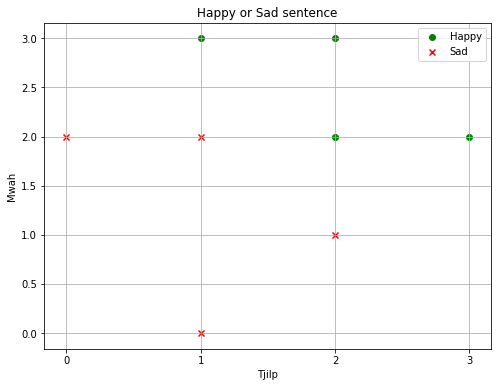

In [34]:
happy_sentence = data[data["mood"] == "Happy"]
sad_sentence = data[data["mood"] == "Sad"]
plot_sentiment(happy_sentence, sad_sentence)

In [35]:
data = pd.DataFrame({
    "tjilp":[1,0,2,1,1,2,3,2,4,2,3,4,4,3],
    "mwah": [0,2,1,2,3,2,2,3,4,4,1,2,0,3],
    "mood": ["Sad", "Sad", "Sad", "Sad", "Happy", "Happy", "Sad", "Happy", "Happy", "Happy", "Sad", "Happy", "Happy","Sad"]
    })

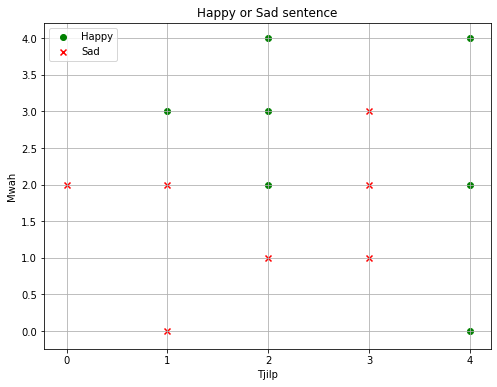

In [36]:
happy_sentence = data[data["mood"] == "Happy"]
sad_sentence = data[data["mood"] == "Sad"]
plot_sentiment(happy_sentence, sad_sentence)

In [40]:
data["label"]=data["mood"].apply(lambda x: 1 if x == "Happy" else 0)

In [41]:
data

,tjilp,mwah,mood,label
0,1,0,Sad,0
1,0,2,Sad,0
2,2,1,Sad,0
3,1,2,Sad,0
4,1,3,Happy,1
5,2,2,Happy,1
6,3,2,Sad,0
7,2,3,Happy,1
8,4,4,Happy,1
9,2,4,Happy,1


In [43]:
data[["tjilp","mwah"]]

,tjilp,mwah
0,1,0
1,0,2
2,2,1
3,1,2
4,1,3
5,2,2
6,3,2
7,2,3
8,4,4
9,2,4


In [61]:
def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0
    
def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if (pred == label):
        return 0
    else:
        return np.abs(score(weights, bias, features))
    
def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i]) # do you understand why we take i for some parameters?
    return total_error / len(features)

def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label - pred)*features[i]*learning_rate
    bias += (label - pred) * learning_rate
    return weights, bias

def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        error = mean_perceptron_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features) - 1) # Pick a random point in our dataset
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    return weights, bias, errors

In [62]:
features = data[["tjilp","mwah"]].to_numpy()
labels = data["label"].to_numpy()

In [63]:
features[0]

array([1, 0])

In [80]:
# draw found line and the points
found_weights, found_bias, found_errors = perceptron_algorithm(features, labels)

In [81]:
prediction(found_weights, found_bias, np.array([5,5]))

1